# READING DATASET

Now we are Presenting the code & methods for acquiring the data. Loading the data into appropriate format for analysis.

In [1]:
#importing the required libraries 
import pandas as pd
from plotnine import ggplot
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#using pandas library and 'read_csv' function to read csv file 
dataf=pd.read_csv("Recruitment_Data.csv")
#examine head 
dataf.head(5)

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [3]:
#checking number of rows in dataset
dataf.shape

(446, 4)

In [4]:
#to find the information about the data
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


# Understanding and Cleaning Data

Presenting the code and methods for acquiring the data. Loading the data into appropriate format for analysis. Explaining the process and results

In [5]:
#looking to find out first what columns have null values
#using 'isnull' function will show us how many nulls are found in each column in dataset
print(round((100*dataf.isnull().mean()).sort_values(ascending=False),2))


recruiting_source     45.96
attrition              0.00
performance_rating     0.00
sales_quota_pct        0.00
dtype: float64


In [6]:
#to find description of the numerical data in the DataFrame.
dataf.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [7]:
#using describe function to see details of recruiting source
dataf["recruiting_source"].describe()

count                241
unique                 4
top       Applied Online
freq                 130
Name: recruiting_source, dtype: object

In [8]:
dataf["recruiting_source"].unique()

array(['Applied Online', nan, 'Campus', 'Referral', 'Search Firm'],
      dtype=object)

In [9]:
dataf["recruiting_source"].value_counts()

Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: recruiting_source, dtype: int64

# Applied online is the most common way of recruitment.

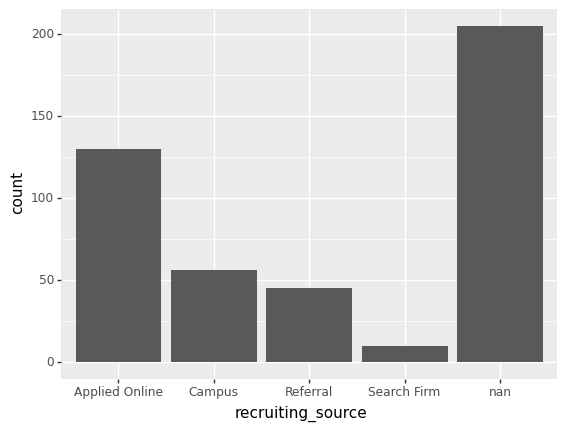

<ggplot: (142006569039)>

In [10]:
#importing ggplot to make plot for the count of recruiting_source
from plotnine.data import mpg
from plotnine import ggplot, aes, geom_bar

ggplot(dataf) + aes(x="recruiting_source") + geom_bar()

In [13]:
#Printing the average Sales Number grouped by Recruiting Source
avg_sales = dataf.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales

recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

# After grouping by recruiting source we can see that maximum average sales is from applied online and referral category.

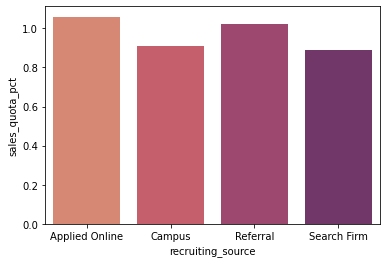

In [17]:
#Printing the graph of Sales Number grouped by Recruiting Source
sns.barplot(data=dataf, x='recruiting_source', y='sales_quota_pct',ci=None ,palette='flare')
plt.show()

In [18]:
#Printing the average Attrition Number grouped by Recruiting Source
avg_attrition_number = dataf.groupby("recruiting_source")["attrition"].mean()
avg_attrition_number

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64

# After grouping by recruiting source we can see that minimum attrition is done by applied online category.

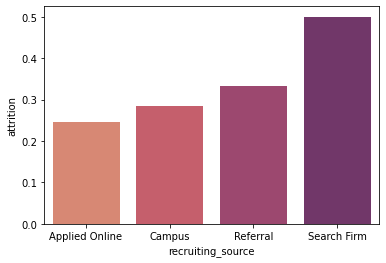

In [19]:
#Printing the graph of Attrition Number grouped by Recruiting Source
sns.barplot(data=dataf, x='recruiting_source', y='attrition',ci=None, palette='flare')
plt.show()

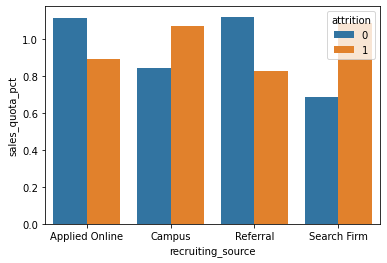

In [20]:
#bar plot to see recruiting sources that have high Sales numbers and low Attrition numbers
sns.barplot(data=dataf, x='recruiting_source', y='sales_quota_pct',hue="attrition",ci=None)
plt.show()

# After looking the graph we can see that applied online and referral recruiting sources have high Sales numbers and low Attrition numbers.